# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets
import torch

In [3]:
from file_io import load_pickle_file
from constants import *
from utils import *
from image_transforms import *
from interpreters.utils import get_interpreter
import logging

In [4]:
if RANDOM_SEED:
    set_random_seeds(RANDOM_SEED)
logging.basicConfig(level=logging.INFO)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, TransformsTest)

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.8857142857142857

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

mug           0.928571
mug filled    1.000000
broken mug    0.769231
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,mug,mug filled,broken mug
mug,0.928571,0.071429,0.000000
mug filled,0.000000,1.000000,0.000000
broken mug,0.153846,0.076923,0.769231


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,mug propability,mug filled propability,broken mug propability,true,predicted,error,confidence
2,0.304861,0.626627,0.068512,[broken mug],[mug filled],0.620992,0.485225
28,0.801820,0.060696,0.137484,[broken mug],[mug],0.575011,0.705869
16,0.586537,0.226538,0.186925,[broken mug],[mug],0.542050,0.381352
14,0.369480,0.543771,0.086749,[mug],[mug filled],0.420347,0.399489
27,0.242096,0.270704,0.487201,[broken mug],[broken mug],0.341866,0.232127


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,mug propability,mug filled propability,broken mug propability,true,predicted,error,confidence
27,0.242096,0.270704,0.487201,[broken mug],[broken mug],0.341866,0.232127
16,0.586537,0.226538,0.186925,[broken mug],[mug],0.542050,0.381352
14,0.369480,0.543771,0.086749,[mug],[mug filled],0.420347,0.399489
24,0.089060,0.292873,0.618067,[broken mug],[broken mug],0.254622,0.462135
34,0.472657,0.022159,0.505184,[broken mug],[broken mug],0.329877,0.467610


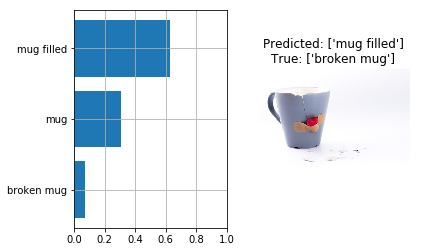

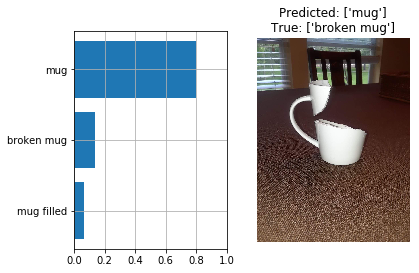

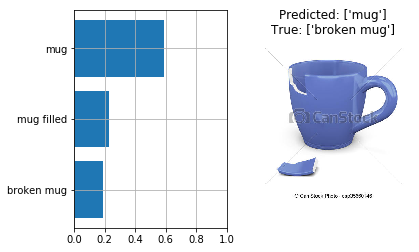

In [15]:
interpreter.plot_most_incorrect_samples(3)

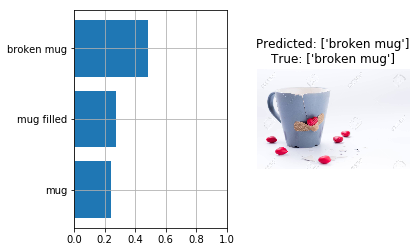

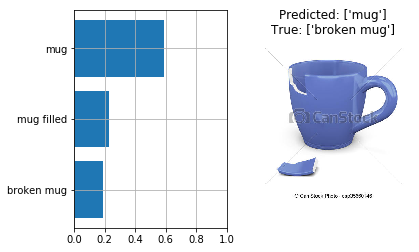

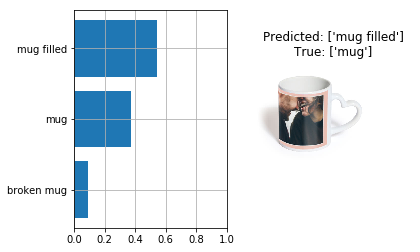

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=34), Output()), _do…